In [ ]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#All Imports

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd 
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import sklearn.model_selection as model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from time import time
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
cid = "3084b278d0a74e879edacecb9e57f1ff"
secret = "d950e13a6cf747959252dc5bbb0b930f"

In [ ]:
#Authentication - Spotify Developer Account
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [ ]:
def analyze_playlist(creator, playlist_id, genre_type):
    
    # Creating an empty dataframe
    playlist_features_list = ["genre","artist","album","track_name",  "track_id","acousticness", "danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"] 
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Looping through every track in the playlist, extracting features and appending them to the playlist df

    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        playlist_features["genre"] =genre_type
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[5:8]:
            playlist_features[feature] = audio_features[feature]*1000
        
        for feature in playlist_features_list[8:]:
            playlist_features[feature] = audio_features[feature]

        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    return playlist_df

In [ ]:
playlist_creator = "spotify"
playlist_id = "4oBAlPMMM8HqTd9ee6GiRr"
genre_type="electro"
playlist_electro=analyze_playlist(playlist_creator, playlist_id,genre_type)
len(playlist_electro)

100

In [ ]:
playlist_creator = "spotify"
playlist_id = "37i9dQZF1DWWJOmJ7nRx0C"
genre_type="rock"
playlist_rock=analyze_playlist(playlist_creator, playlist_id,genre_type)
len(playlist_rock)

100

In [ ]:
playlist_creator = "spotify"
playlist_id = "7qACZGMjyo64TdUdKAegjp"
genre_type="blues"
playlist_blues=analyze_playlist(playlist_creator, playlist_id,genre_type)
len(playlist_blues)

100

In [ ]:
playlist_creator = "spotify"
playlist_id = "3HYK6ri0GkvRcM6GkKh0hJ"
genre_type="classical"
playlist_classical=analyze_playlist(playlist_creator, playlist_id,genre_type)
len(playlist_classical)

100

In [ ]:
playlist_creator = "spotify"
playlist_id = "37i9dQZF1DX52ln8eMkne9"
genre_type="jazz"
playlist_jazz=analyze_playlist(playlist_creator, playlist_id,genre_type)
len(playlist_jazz)

100

In [ ]:
playlist_creator = "spotify"
playlist_id = "6MXkE0uYF4XwU4VTtyrpfP"
genre_type="hiphop"
playlist_hiphop=analyze_playlist(playlist_creator, playlist_id,genre_type)
len(playlist_hiphop)

100

In [ ]:
final_df = pd.concat([playlist_classical, playlist_jazz,playlist_rock,playlist_electro,playlist_hiphop, playlist_blues],ignore_index=True, axis=0)
len(final_df)
final_df

,genre,artist,album,track_name,track_id,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,classical,Johann Sebastian Bach,"Bach: The Goldberg Variations, BWV 988 (1981 G...","Goldberg Variations, BWV 988: Aria",5bu9A6uphPWg39RC3ZKeku,0.995,0.4540,0.01390,4,-29.966,0,0.0514,0.943,0.0736,0.2440,130.253,184853,4
1,classical,George Frideric Handel,Handel Sarabande,Handel / Orch. Hale: Keyboard Suite No. 4 in D...,1upQiytDIEZfl9ItruoXuC,0.927,0.0939,0.03360,2,-24.041,0,0.0606,0.83,0.0954,0.0516,67.359,207267,3
2,classical,Joseph Haydn,Haydn: Cello Concertos (Remastered),"Cello Concerto No. 1 in C Major, Hob. VIIb:1: ...",3cc1BpGtocKOEnROApTv8M,0.972,0.0859,0.06530,5,-24.541,1,0.0572,0.889,0.0876,0.0680,61.538,493800,4
3,classical,Ludwig van Beethoven,"Beethoven: Piano Sonatas, Vol.3","Sonata No. 14 ""Moonlight"" in C-Sharp Minor"", O...",3DNRdudZ2SstnDCVKFdXxG,0.995,0.1840,0.00527,1,-37.264,0,0.0432,0.887,0.1730,0.1510,170.612,315427,3
4,classical,Frédéric Chopin,Chopin: Nocturnes,"Nocturne No. 2 in E-Flat Major, Op. 9 No. 2",1VNvsvEsUpuUCbHpVop1vo,0.984,0.4420,0.00919,3,-32.452,1,0.0470,0.936,0.0873,0.0929,79.314,273667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,blues,Melvin Taylor,"Plays the Blues for You (feat. Lucky Peterson,...",Cadillac Assembly Line,6QYEoTGa0Boucy6htF83tb,0.656,0.7350,0.35500,9,-19.032,0,0.0387,0.094,0.1190,0.7240,93.553,318333,4
596,blues,Johnny Copeland,Jungle Swing,Blues Ain't Nothin',5SbzJktq4z4iBVkdtYiYly,0.276,0.6270,0.48600,10,-9.448,0,0.0396,0.000518,0.2770,0.6920,171.601,242333,4
597,blues,Mike Bloomfield,Super Session (with Al Kooper & Stephen Stills),Stop,4aWZIBCBMQEgMna9JpgW90,0.256,0.4770,0.60700,9,-8.330,1,0.0471,0.146,0.1070,0.6400,87.301,258800,4
598,blues,Keb' Mo',Martin Scorsese Presents The Blues: Keb' Mo',Am I Wrong,3xoMRK8egNvtjrCEQieLko,0.462,0.8830,0.44600,0,-10.304,1,0.0574,0.000001,0.0447,0.9640,112.635,138427,4


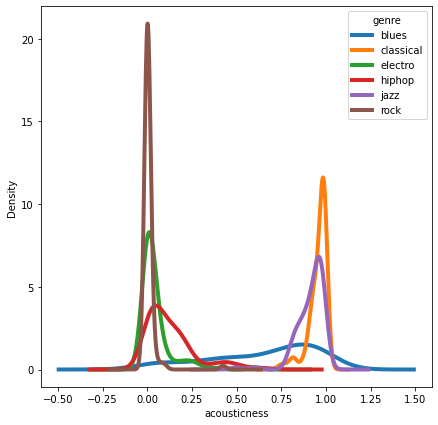

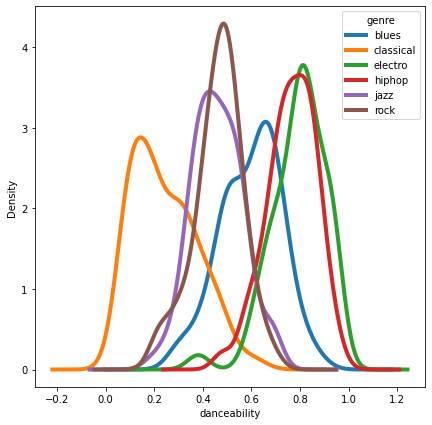

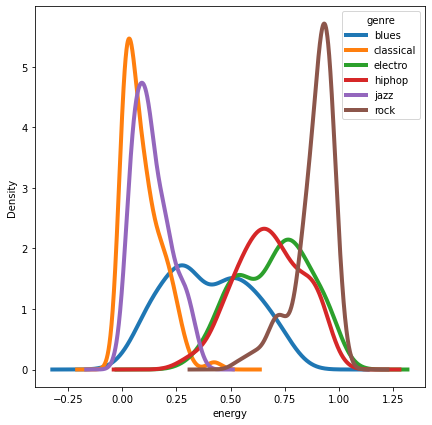

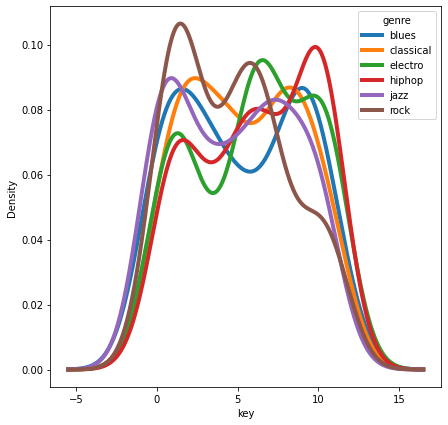

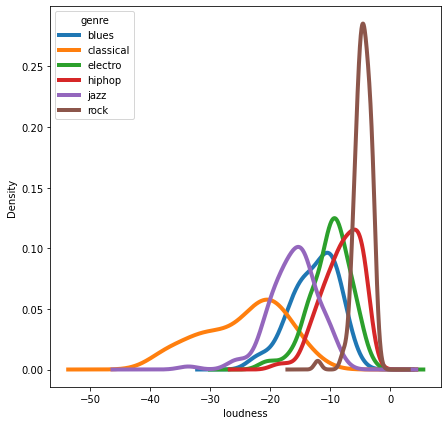

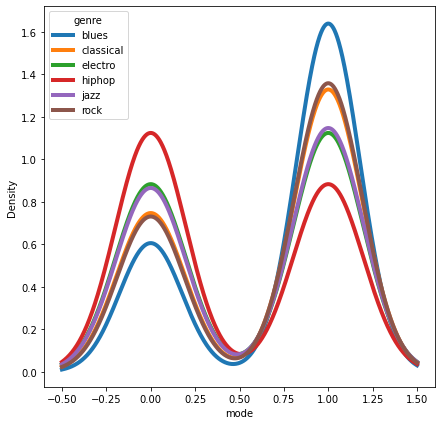

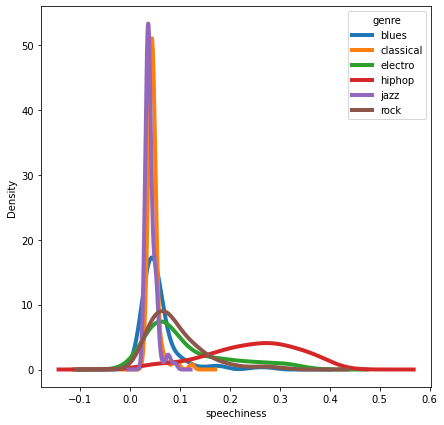

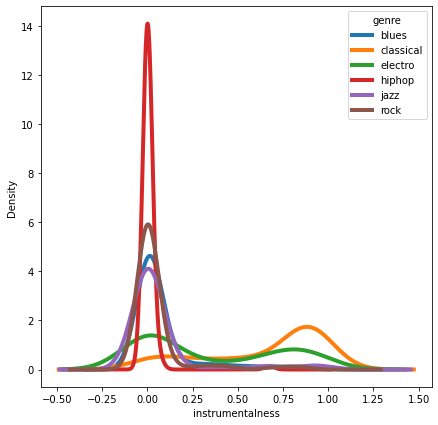

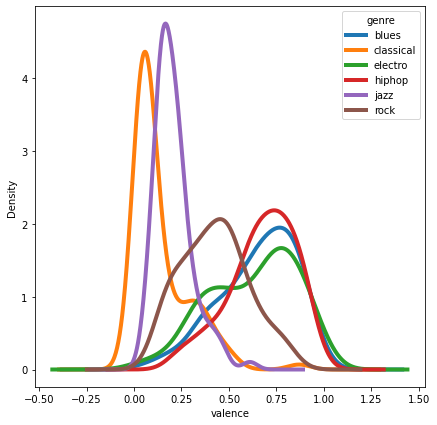

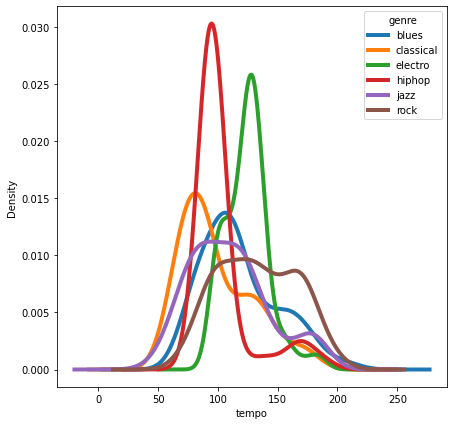

In [ ]:
#Density Graphs

ft = ["acousticness","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","valence","tempo"]

for x in ft:
  temp = final_df.pivot(columns='genre', values=x)
  temp.plot.density(figsize = (7, 7), linewidth = 4)
  plt.xlabel(x)

In [ ]:
X=final_df[[ "acousticness","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","valence","tempo"]] # Features
y=final_df['genre']  # Label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

classifier = svm.SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 

print('Confusion matrix for SVM\n')
print(confusion_matrix(y_test,y_pred ))
print('\n')
print(classification_report(y_test,y_pred ))

print("Accuracy of SVM: ",accuracy_score(y_true = y_test, y_pred=y_pred,)*100,'%\n')

Confusion matrix for SVM

[[ 0  1  4  8  0  4]
 [ 1 12  8  2  5  0]
 [ 0  0 17  5  1  2]
 [ 0  0  0 17  0  3]
 [ 0  3  2  7  2  3]
 [ 0  0  0  3  0 10]]


              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        17
   classical       0.75      0.43      0.55        28
     electro       0.55      0.68      0.61        25
      hiphop       0.40      0.85      0.55        20
        jazz       0.25      0.12      0.16        17
        rock       0.45      0.77      0.57        13

    accuracy                           0.48       120
   macro avg       0.40      0.47      0.41       120
weighted avg       0.44      0.48      0.43       120

Accuracy of SVM:  48.333333333333336 %



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

gaussian = GaussianNB()

gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test) 

print('Confusion matrix for Naive Bayes\n')
print(confusion_matrix(y_test,y_pred ))
print('\n')
print(classification_report(y_test,y_pred ))

print("Accuracy of Naive Bayes:",accuracy_score(y_true = y_test, y_pred=y_pred,)*100,'%\n')

Confusion matrix for Naive Bayes

[[19  0  1  0  1  1]
 [ 1 13  0  0  2  0]
 [ 0  0 16  5  0  0]
 [ 1  0  2 17  0  1]
 [ 2  2  0  0 18  0]
 [ 1  0  2  0  0 15]]


              precision    recall  f1-score   support

       blues       0.79      0.86      0.83        22
   classical       0.87      0.81      0.84        16
     electro       0.76      0.76      0.76        21
      hiphop       0.77      0.81      0.79        21
        jazz       0.86      0.82      0.84        22
        rock       0.88      0.83      0.86        18

    accuracy                           0.82       120
   macro avg       0.82      0.82      0.82       120
weighted avg       0.82      0.82      0.82       120

Accuracy of Naive Bayes: 81.66666666666667 %



In [ ]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print('Confusion matrix for Random Forest\n')
print(confusion_matrix(y_test,y_pred ))
print('\n')
print(classification_report(y_test,y_pred ))

print("Accuracy of Random forest:",accuracy_score(y_true = y_test, y_pred=y_pred,)*100,'%\n')

Confusion matrix for Random Forest

[[14  0  2  1  0  0]
 [ 0 17  0  0  0  0]
 [ 1  0 17  0  0  0]
 [ 0  0  0 20  0  1]
 [ 2  2  0  0 18  0]
 [ 1  0  0  0  0 24]]


              precision    recall  f1-score   support

       blues       0.78      0.82      0.80        17
   classical       0.89      1.00      0.94        17
     electro       0.89      0.94      0.92        18
      hiphop       0.95      0.95      0.95        21
        jazz       1.00      0.82      0.90        22
        rock       0.96      0.96      0.96        25

    accuracy                           0.92       120
   macro avg       0.91      0.92      0.91       120
weighted avg       0.92      0.92      0.92       120

Accuracy of Random forest: 91.66666666666666 %



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('Confusion matrix for KNN neigbour 1\n')
print(confusion_matrix(y_test,y_pred ))
print('\n')
print(classification_report(y_test,y_pred ))

print("Accuracy of KNN with K=1:",accuracy_score(y_true = y_test, y_pred=y_pred,)*100,'%\n')

Confusion matrix for KNN neigbour 1

[[11  0  3  1  2  0]
 [ 2 14  0  0  1  0]
 [ 0  0 17  1  0  0]
 [ 0  0  3 17  1  0]
 [ 2  2  0  0 18  0]
 [ 1  0  0  2  0 22]]


              precision    recall  f1-score   support

       blues       0.69      0.65      0.67        17
   classical       0.88      0.82      0.85        17
     electro       0.74      0.94      0.83        18
      hiphop       0.81      0.81      0.81        21
        jazz       0.82      0.82      0.82        22
        rock       1.00      0.88      0.94        25

    accuracy                           0.82       120
   macro avg       0.82      0.82      0.82       120
weighted avg       0.83      0.82      0.83       120

Accuracy of KNN with K=1: 82.5 %



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('Confusion matrix for KNN neigbour 10\n')
print(confusion_matrix(y_test,y_pred ))
print('\n')
print(classification_report(y_test,y_pred ))

print("Accuracy of KNN with K=10:",accuracy_score(y_true = y_test, y_pred=y_pred,)*100,'%\n')

Confusion matrix for KNN neigbour 10

[[11  0  3  1  2  0]
 [ 2 14  0  0  1  0]
 [ 0  0 17  1  0  0]
 [ 0  0  3 17  1  0]
 [ 2  2  0  0 18  0]
 [ 1  0  0  2  0 22]]


              precision    recall  f1-score   support

       blues       0.69      0.65      0.67        17
   classical       0.88      0.82      0.85        17
     electro       0.74      0.94      0.83        18
      hiphop       0.81      0.81      0.81        21
        jazz       0.82      0.82      0.82        22
        rock       1.00      0.88      0.94        25

    accuracy                           0.82       120
   macro avg       0.82      0.82      0.82       120
weighted avg       0.83      0.82      0.83       120

Accuracy of KNN with K=10: 82.5 %



Confusion matrix for ID3

[[17  0  3  0  1  1]
 [ 2 12  0  0  2  0]
 [ 2  0 14  5  0  0]
 [ 2  0  4 15  0  0]
 [ 3  1  0  0 18  0]
 [ 1  0  2  1  0 14]]


              precision    recall  f1-score   support

       blues       0.63      0.77      0.69        22
   classical       0.92      0.75      0.83        16
     electro       0.61      0.67      0.64        21
      hiphop       0.71      0.71      0.71        21
        jazz       0.86      0.82      0.84        22
        rock       0.93      0.78      0.85        18

    accuracy                           0.75       120
   macro avg       0.78      0.75      0.76       120
weighted avg       0.77      0.75      0.75       120

Accuracy of ID3: 75.0 %



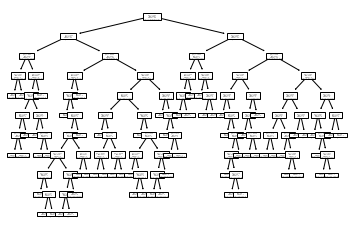

In [ ]:
id3 = DecisionTreeClassifier()
id3.fit(X_train , y_train)
y_pred = id3.predict(X_test)
print('Confusion matrix for ID3\n')
print(confusion_matrix(y_test,y_pred ))
print('\n')
print(classification_report(y_test,y_pred ))
print("Accuracy of ID3:",accuracy_score(y_true = y_test, y_pred=y_pred,)*100,'%\n')

tree.plot_tree(id3);